In [1]:
!pip install cdsapi

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'snow_depth_water_equivalent',
        'year': '2022',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'month': '12',
        'format': 'netcdf',
    },
    'download_big.nc')

In [2]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': 'snow_depth_water_equivalent',
        'year': '2022',
        'time': ['12:00'],
        'day': [
            '29',
            '30',
            '31',
        ],
        'month': '12',
        'format': 'netcdf',
    },
    'download_XXXXXXsmall.nc')

2023-08-22 13:45:40,526 INFO Welcome to the CDS
2023-08-22 13:45:40,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-22 13:45:40,866 INFO Request is queued
2023-08-22 13:45:42,188 INFO Request is running
2023-08-22 13:45:50,293 INFO Request is completed
2023-08-22 13:45:50,294 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data6/adaptor.mars.internal-1692737594.9408298-8922-1-f8ad9fc2-34b1-47b5-b4d6-3ba2e90aa0b9.nc to download_Xsmall.nc (37.1M)
2023-08-22 14:08:42,894 INFO Download rate 27.7K/s                                                                      


Result(content_length=38924364,content_type=application/x-netcdf,location=https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data6/adaptor.mars.internal-1692737594.9408298-8922-1-f8ad9fc2-34b1-47b5-b4d6-3ba2e90aa0b9.nc)

In [2]:
!conda env list


# conda environments:
#
base                     /home/dchalkeys/miniconda3
env2                  *  /home/dchalkeys/miniconda3/envs/env2
py39                     /home/dchalkeys/miniconda3/envs/py39



In [3]:
!pip install xarray geopandas


  Obtaining dependency information for xarray from https://files.pythonhosted.org/packages/cc/21/c3a9d3017c131cea3c2967957b05448ffc81cafced239796bbbdc98073e4/xarray-2023.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/cb/7b/2fb6ab376c78d2e60812ad0bf4b24889309d2aeb543f54efcd586c69907f/geopandas-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.19 from https://files.pythonhosted.org/packages/ab/51/4353865344a6ac32f7b8ed3f2363a4b1286d5c9e2b53ce3bb61982e3aaa8/Fiona-1.9.4.post1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pyproj>=3.0.1 from https://files.pythonhosted.org/packages/03/8c/e66f507401e1ecee547961894bef21af82d979019a05675afafb1362a425/pyproj-3.6.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━

In [8]:
!pip install netcdf4 scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/a3/d3/f88285098505c8e5d141678a24bb9620d902c683f11edc1eb9532b02624e/scipy-1.11.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 779.5 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.5/36.5 MB 401.8 kB/s eta 0:00:0000:0100:03


## Open Data in GeoPandas

In [1]:
print()

#### Loading data from https://saturncloud.io/blog/how-to-extract-countries-from-netcdf-data-using-geopandas/

In [1]:
import xarray as xr

# Open w/ xarray
nc_file = 'download_Xsmall.nc'
ds = xr.open_dataset(nc_file)
ds

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 3)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2022-12-29T12:00:00 ... 2022-12-31T12:00:00
Data variables:
    sd         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-22 20:53:16 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [2]:
import geopandas as gpd

# Extract the snow depth water equivalent
sdwe = ds['sd']
sdwe

<xarray.DataArray 'sd' (time: 3, latitude: 1801, longitude: 3600)>
[19450800 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2022-12-29T12:00:00 ... 2022-12-31T12:00:00
Attributes:
    units:          m of water equivalent
    long_name:      Snow depth
    standard_name:  lwe_thickness_of_surface_snow_amount

In [4]:
# convert to pandas data frame
df = sdwe.to_dataframe().reset_index()
df

,time,latitude,longitude,sd
0,2022-12-29 12:00:00,90.0,0.000000,NaN
1,2022-12-29 12:00:00,90.0,0.100000,NaN
2,2022-12-29 12:00:00,90.0,0.200000,NaN
3,2022-12-29 12:00:00,90.0,0.300000,NaN
4,2022-12-29 12:00:00,90.0,0.400000,NaN
...,...,...,...,...
19450795,2022-12-31 12:00:00,-90.0,359.500000,10.0
19450796,2022-12-31 12:00:00,-90.0,359.600006,10.0
19450797,2022-12-31 12:00:00,-90.0,359.700012,10.0
19450798,2022-12-31 12:00:00,-90.0,359.799988,10.0


In [5]:
# Convert to geopandas 
gdf = gpd.GeoDataFrame(
    df[["sd", "time"]],
    geometry=gpd.points_from_xy(df.longitude,df.latitude)
)

gdf

,sd,time,geometry
0,NaN,2022-12-29 12:00:00,POINT (0.000 90.000)
1,NaN,2022-12-29 12:00:00,POINT (0.100 90.000)
2,NaN,2022-12-29 12:00:00,POINT (0.200 90.000)
3,NaN,2022-12-29 12:00:00,POINT (0.300 90.000)
4,NaN,2022-12-29 12:00:00,POINT (0.400 90.000)
...,...,...,...
19450795,10.0,2022-12-31 12:00:00,POINT (359.500 -90.000)
19450796,10.0,2022-12-31 12:00:00,POINT (359.600 -90.000)
19450797,10.0,2022-12-31 12:00:00,POINT (359.700 -90.000)
19450798,10.0,2022-12-31 12:00:00,POINT (359.800 -90.000)


In [9]:
# Filter out null values
gdf = gdf[~gdf["sd"].isna()]

In [10]:
# Save data
gdf.to_parquet("full_data.parquet")

In [11]:
gdf

,sd,time,geometry
237234,10.0,2022-12-29 12:00:00,POINT (323.400 83.500)
237235,10.0,2022-12-29 12:00:00,POINT (323.500 83.500)
237236,10.0,2022-12-29 12:00:00,POINT (323.600 83.500)
237237,10.0,2022-12-29 12:00:00,POINT (323.700 83.500)
237238,10.0,2022-12-29 12:00:00,POINT (323.800 83.500)
...,...,...,...
19450795,10.0,2022-12-31 12:00:00,POINT (359.500 -90.000)
19450796,10.0,2022-12-31 12:00:00,POINT (359.600 -90.000)
19450797,10.0,2022-12-31 12:00:00,POINT (359.700 -90.000)
19450798,10.0,2022-12-31 12:00:00,POINT (359.800 -90.000)


<AxesSubplot: >

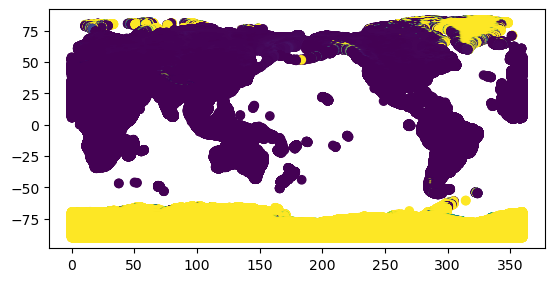

In [21]:
# First test plot

gdf[~gdf['sd'].isna() & (gdf['time']=="2022-12-29 12:00:00")].plot(column='sd')

In [5]:
day_df = gdf[~gdf['sd'].isna() & (gdf['time']=="2022-12-29 12:00:00")].reset_index(drop=True)
day_df

,sd,time,geometry
0,10.0,2022-12-29 12:00:00,POINT (323.400 83.500)
1,10.0,2022-12-29 12:00:00,POINT (323.500 83.500)
2,10.0,2022-12-29 12:00:00,POINT (323.600 83.500)
3,10.0,2022-12-29 12:00:00,POINT (323.700 83.500)
4,10.0,2022-12-29 12:00:00,POINT (323.800 83.500)
...,...,...,...
2212858,10.0,2022-12-29 12:00:00,POINT (359.500 -90.000)
2212859,10.0,2022-12-29 12:00:00,POINT (359.600 -90.000)
2212860,10.0,2022-12-29 12:00:00,POINT (359.700 -90.000)
2212861,10.0,2022-12-29 12:00:00,POINT (359.800 -90.000)


In [ ]:
# Took too long
day_df.explore()

In [11]:
day_df['time'] = day_df['time'].astype(str)

In [12]:
day_df['time']

0          2022-12-29 12:00:00
1          2022-12-29 12:00:00
2          2022-12-29 12:00:00
3          2022-12-29 12:00:00
4          2022-12-29 12:00:00
                  ...         
2212858    2022-12-29 12:00:00
2212859    2022-12-29 12:00:00
2212860    2022-12-29 12:00:00
2212861    2022-12-29 12:00:00
2212862    2022-12-29 12:00:00
Name: time, Length: 2212863, dtype: object

In [12]:
day_df = day_df.set_index('time')
day_df

,sd,geometry
time,,
2022-12-29 12:00:00,10.0,POINT (323.400 83.500)
2022-12-29 12:00:00,10.0,POINT (323.500 83.500)
2022-12-29 12:00:00,10.0,POINT (323.600 83.500)
2022-12-29 12:00:00,10.0,POINT (323.700 83.500)
2022-12-29 12:00:00,10.0,POINT (323.800 83.500)
...,...,...
2022-12-29 12:00:00,10.0,POINT (359.500 -90.000)
2022-12-29 12:00:00,10.0,POINT (359.600 -90.000)
2022-12-29 12:00:00,10.0,POINT (359.700 -90.000)


In [13]:
s_day_df = day_df.sample(frac=0.05)
s_day_df

,sd,geometry
time,,
2022-12-29 12:00:00,0.000000,POINT (37.000 31.700)
2022-12-29 12:00:00,10.000000,POINT (358.900 -89.600)
2022-12-29 12:00:00,10.000000,POINT (327.100 -86.300)
2022-12-29 12:00:00,0.094761,POINT (284.500 79.200)
2022-12-29 12:00:00,0.130316,POINT (275.700 66.600)
...,...,...
2022-12-29 12:00:00,10.000000,POINT (210.300 -82.500)
2022-12-29 12:00:00,0.171211,POINT (8.600 46.500)
2022-12-29 12:00:00,10.000000,POINT (273.700 -83.900)


In [15]:
s_day_df.index = s_day_df.index.astype(str)

In [ ]:
s_day_df.explore()

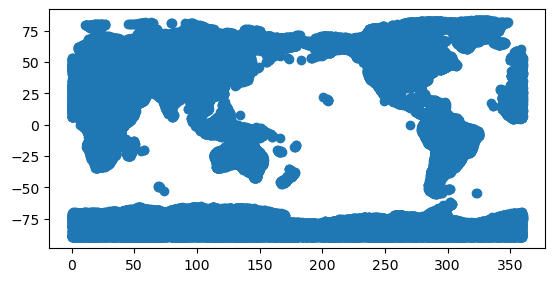

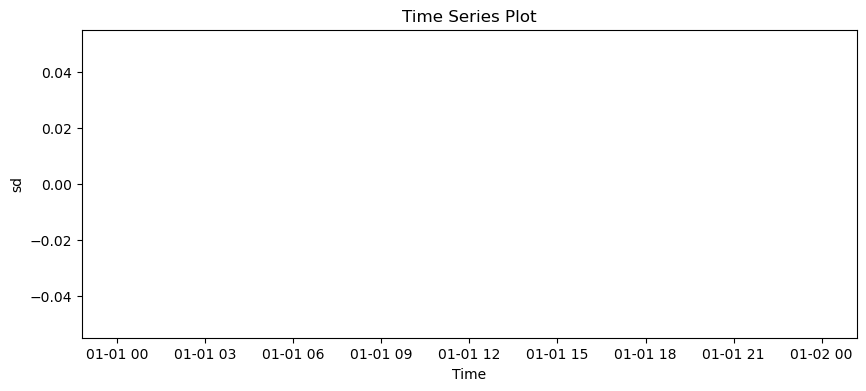

IntSlider(value=0, description='Row:', max=19450799)

In [18]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

ax = s_day_df.plot()

# Create the time series plot using Matplotlib
def update_time_series_plot(selected_row):
    plt.figure(figsize=(10, 4))
    selected_data = gdf.iloc[selected_row]
    # Replace x and y with your actual time and value columns
    plt.plot(selected_data['time'], selected_data['sd'])
    plt.xlabel('Time')
    plt.ylabel('sd')
    plt.title('Time Series Plot')
    plt.show()

# Create an interactive widget to select rows on the map
row_selector = widgets.IntSlider(min=0, max=len(gdf) - 1, description='Row:')
widgets.interact(update_time_series_plot, selected_row=row_selector)

# Display the map and widget
plt.show()
display(row_selector)

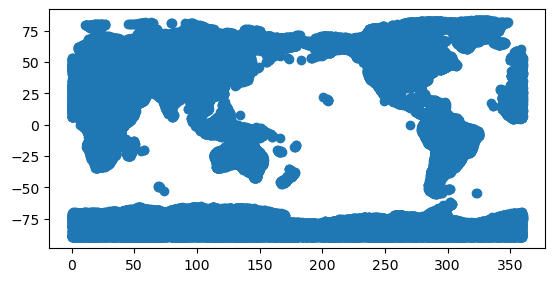

In [19]:
# Create the map using GeoPandas
ax = s_day_df.plot()

# Define the click event handler
def on_click(event):
    if event.inaxes == ax:
        # Get the clicked point's x, y coordinates
        x, y = event.xdata, event.ydata
        # Use GeoPandas spatial indexing to find the clicked point
        clicked_point = gdf[gdf.geometry.distance((x, y)).idxmin()]
        
        # Create a time series plot using Matplotlib
        plt.figure(figsize=(10, 4))
        # Replace 'time' and 'value' with your actual time and value columns
        plt.plot(clicked_point['time'], clicked_point['sd'])
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Time Series Plot')
        plt.show()

# Connect the click event handler to the figure
fig = ax.get_figure()
fig.canvas.mpl_connect('button_press_event', on_click)

# Display the map
plt.show()

In [20]:
gdf_s = gdf[(~gdf["sd"].isna())].sample(frac=0.04).set_index("time")

gdf_s

,sd,geometry
time,,
2022-12-29 12:00:00,10.000000,POINT (65.200 -76.200)
2022-12-31 12:00:00,0.102391,POINT (243.800 46.300)
2022-12-30 12:00:00,10.000000,POINT (204.600 -89.900)
2022-12-31 12:00:00,10.000000,POINT (331.300 -87.400)
2022-12-31 12:00:00,0.048068,POINT (64.900 56.500)
...,...,...
2022-12-29 12:00:00,0.000000,POINT (49.700 19.000)
2022-12-31 12:00:00,0.080723,POINT (147.800 45.100)
2022-12-30 12:00:00,10.000000,POINT (100.800 -81.800)


In [22]:
gdf_s = gdf_s.sort_values("time")
gdf_s

,sd,geometry
time,,
2022-12-29 12:00:00,10.000000,POINT (65.200 -76.200)
2022-12-29 12:00:00,0.129248,POINT (97.500 64.700)
2022-12-29 12:00:00,0.000000,POINT (82.900 22.900)
2022-12-29 12:00:00,0.000000,POINT (27.900 -8.200)
2022-12-29 12:00:00,0.084843,POINT (102.400 69.800)
...,...,...
2022-12-31 12:00:00,0.001831,POINT (117.800 29.800)
2022-12-31 12:00:00,0.000000,POINT (98.000 27.300)
2022-12-31 12:00:00,0.074008,POINT (34.900 56.700)


In [24]:
gdf_s.to_parquet("3day_s.parquet")

In [26]:
!pip install mplleaflet

  Preparing metadata (setup.py) ... done
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28566 sha256=1dd8af96cb8b2bed17147e98e78c7662e62210836b70f93c463cc77c4a4f91c6
  Stored in directory: /home/dchalkeys/.cache/pip/wheels/54/11/d6/5d25309bb8b662bd29880f7ffec893b66ffa677086a436c041
Successfully built mplleaflet


#### Chat GPT onclick code

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd


gdf = gdf_s

# Define the click event function
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        clicked_point = Point(event.xdata, event.ydata)
        nearest_row = gdf.distance(clicked_point).idxmin()
        selected_data = gdf.loc[nearest_row, 'time_series']
        
        # Plot the time series data
        plt.figure(figsize=(10, 4))
        plt.plot(selected_data.index, selected_data.sd)
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Time Series Plot')
        plt.show()

# Create the interactive map using mplleaflet
fig, ax = plt.subplots()
gdf.plot(ax=ax, marker='o', color='blue', markersize=1)
plt.title('Click on a point to display time series')

plt.gcf().canvas.mpl_connect('button_press_event', onclick)
mplleaflet.show()



AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

#### More CHatGPT onclick code

TypeError: scatter() got multiple values for argument 'x'

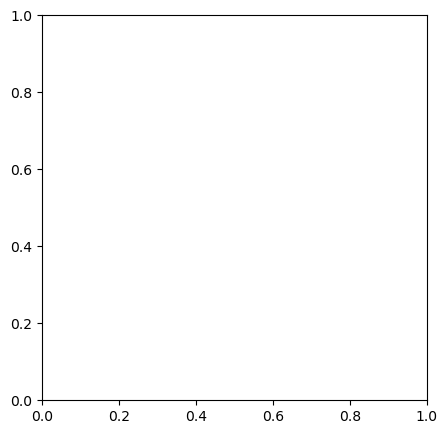

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import base64
from folium import IFrame
import folium




gdf = gdf_s



# Create the interactive map using mplleaflet
#fig, ax = plt.subplots()
#gdf.plot(ax=ax, marker='o', color='blue', markersize=1)
#plt.title('Click on a point to display time series')

#plt.gcf().canvas.mpl_connect('button_press_event', onclick)
#mplleaflet.show()


marker_cluster = folium.Map(location=[48.5, 126], zoom_start=5)


html = '<img src="data:image/png;base64,{}">'.format
encoded = base64.b64encode(open('Marker-595b40b75ba036ed117d9f54.svg', 'rb').read())
#print(20*'-',encoded.decode('UTF-8'))
iframe = IFrame(html(encoded.decode('UTF-8')), width=(5*526)+20, height=(5*526)+20)
popup = folium.Popup(iframe, max_width=2650)

icon = folium.Icon(color="red", icon="ok")
marker = folium.Marker([48.5, 126], popup=popup, icon=icon)
marker.add_to(marker_cluster)

fig, ax = plt.subplots(figsize=(5, 5))
ax = gdf.plot(x='time', y='sd', ax=ax, legend=False)
ax.set_ylabel('Snow Depth Water Equivalent (m)')
png = '/tmp/sdwe_{}.png'.format(counter)
fig.savefig(png, dpi=resolution)